# EDA + Data Cleaning Project

Sales Dataset Analysis

In [26]:
#Load the dataset using pandas and explore the first few rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sales_data = pd.read_csv(r"C:\Users\Lenovo\Downloads\sales_dataset.csv")
sales_data.head()

,Order_ID,Date,Customer_Name,Region,Product_Category,Quantity,Unit_Price,Total_Sales,Discount,Shipping_Cost
0,1001,2024-02-04,Jane Smith,East,Toys,13,700.0,8247,0.10,NaN
1,1002,2024-05-21,Jane Smith,East,Electronics,11,200.0,4030,0.10,80.0
2,1003,2024-12-20,NaN,East,Groceries,12,300.0,4462,0.05,50.0
3,1004,2024-01-17,Olivia Dsouza,North,Books,9,300.0,8778,0.15,80.0
4,1005,2024-08-25,Liam Patel,East,Books,3,200.0,-16,0.10,30.0


In [28]:
# Check the data types of each column and identify missing values.
sales_data.info()
sales_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    int64  
 1   Date              500 non-null    object 
 2   Customer_Name     473 non-null    object 
 3   Region            500 non-null    object 
 4   Product_Category  500 non-null    object 
 5   Quantity          500 non-null    int64  
 6   Unit_Price        448 non-null    float64
 7   Total_Sales       500 non-null    int64  
 8   Discount          409 non-null    float64
 9   Shipping_Cost     442 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 39.2+ KB


Order_ID             0
Date                 0
Customer_Name       27
Region               0
Product_Category     0
Quantity             0
Unit_Price          52
Total_Sales          0
Discount            91
Shipping_Cost       58
dtype: int64

In [29]:
import warnings
warnings.filterwarnings('ignore')


In [30]:
# Handle missing data: fill or drop where appropriate (e.g., mean for numerical, mode for categorical).
numeric_columns=sales_data.select_dtypes(include=["int","float"])
categoric_columns=sales_data.select_dtypes(include=["object"])

In [33]:
numeric_columns.isnull().sum()

Order_ID          0
Quantity          0
Unit_Price       52
Total_Sales       0
Discount         91
Shipping_Cost    58
dtype: int64

In [34]:
categoric_columns.isnull().sum()

Date                 0
Customer_Name       27
Region               0
Product_Category     0
dtype: int64

In [59]:
#numeric_columns[["Unit_Price","Discount","Shipping_Cost"]].fillna(numeric_columns[["Unit_Price","Discount","Shipping_Cost"]].mean(),inplace=True)
#numeric_columns
#numeric_columns[["Unit_Price", "Discount", "Shipping_Cost"]].fillna(numeric_columns[["Unit_Price", "Discount", "Shipping_Cost"]].mean(),inplace=True)
numeric_columns.fillna({
    'Customer_Name': 'Unknown',
    'Discount': 0,
    'Unit_Price': numeric_columns['Unit_Price'].mean(),
    'Shipping_Cost':numeric_columns['Shipping_Cost'].median()
}, inplace=True)


In [61]:
#for categorical column
categoric_columns["Customer_Name"].fillna(categoric_columns["Customer_Name"].mode()[0],inplace=True)


In [60]:
numeric_columns.isnull().sum()

Order_ID         0
Quantity         0
Unit_Price       0
Total_Sales      0
Discount         0
Shipping_Cost    0
dtype: int64

In [50]:
categoric_columns.isnull().sum()

Date                0
Customer_Name       0
Region              0
Product_Category    0
dtype: int64

In [67]:
# Identify and correct invalid entries (e.g., negative quantities or sales)
sales_data = sales_data[sales_data['Quantity'] >= 0]
sales_data = sales_data[sales_data['Total_Sales'] >= 0]
sales_data


,Order_ID,Date,Customer_Name,Region,Product_Category,Quantity,Unit_Price,Total_Sales,Discount,Shipping_Cost
0,1001,2024-02-04,Jane Smith,East,Toys,13,700.0,8247,0.10,NaN
1,1002,2024-05-21,Jane Smith,East,Electronics,11,200.0,4030,0.10,80.0
2,1003,2024-12-20,NaN,East,Groceries,12,300.0,4462,0.05,50.0
3,1004,2024-01-17,Olivia Dsouza,North,Books,9,300.0,8778,0.15,80.0
5,1006,2024-06-15,Chris Lee,East,Clothing,20,300.0,1647,0.10,40.0
...,...,...,...,...,...,...,...,...,...,...
491,1492,2024-09-23,Chris Lee,South,Electronics,5,700.0,9491,0.15,80.0
492,1493,2024-02-04,Emma Roy,South,Clothing,12,100.0,6630,0.15,NaN
493,1494,2024-12-13,Riya Sen,East,Electronics,16,1000.0,7073,0.10,60.0
494,1495,2024-04-04,Jane Smith,North,Clothing,19,NaN,6447,NaN,80.0


In [68]:
#create new derived columns:
# Net_Sales = Total_Sales - (Total_Sales * Discount)
#Profit_Estimate = Net_Sales - Shipping_Cost
sales_data['Net_Sales'] = sales_data['Total_Sales'] - (sales_data['Total_Sales'] * sales_data['Discount'])
sales_data['Profit_Estimate'] = sales_data['Net_Sales'] - sales_data['Shipping_Cost']
sales_data

,Order_ID,Date,Customer_Name,Region,Product_Category,Quantity,Unit_Price,Total_Sales,Discount,Shipping_Cost,Net_Sales,Profit_Estimate
0,1001,2024-02-04,Jane Smith,East,Toys,13,700.0,8247,0.10,NaN,7422.30,NaN
1,1002,2024-05-21,Jane Smith,East,Electronics,11,200.0,4030,0.10,80.0,3627.00,3547.00
2,1003,2024-12-20,NaN,East,Groceries,12,300.0,4462,0.05,50.0,4238.90,4188.90
3,1004,2024-01-17,Olivia Dsouza,North,Books,9,300.0,8778,0.15,80.0,7461.30,7381.30
5,1006,2024-06-15,Chris Lee,East,Clothing,20,300.0,1647,0.10,40.0,1482.30,1442.30
...,...,...,...,...,...,...,...,...,...,...,...,...
491,1492,2024-09-23,Chris Lee,South,Electronics,5,700.0,9491,0.15,80.0,8067.35,7987.35
492,1493,2024-02-04,Emma Roy,South,Clothing,12,100.0,6630,0.15,NaN,5635.50,NaN
493,1494,2024-12-13,Riya Sen,East,Electronics,16,1000.0,7073,0.10,60.0,6365.70,6305.70
494,1495,2024-04-04,Jane Smith,North,Clothing,19,NaN,6447,NaN,80.0,NaN,NaN


In [70]:
# Detect and remove duplicate records
sales_data.drop_duplicates(inplace=True)

In [72]:
# Convert the 'Date' column to a proper datetime format.
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

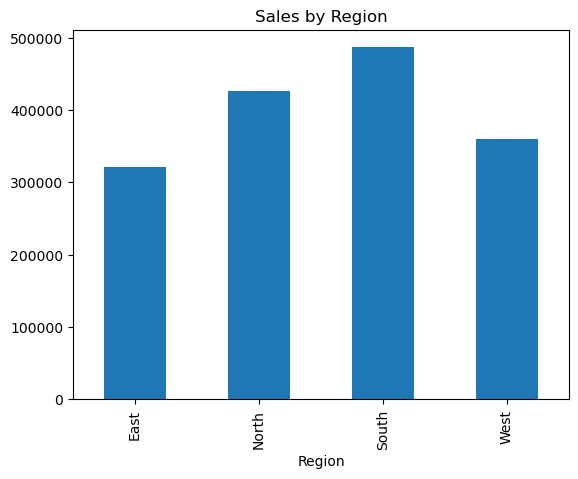

In [73]:
# Generate summary statistics for numerical and categorical variables
sales_data.groupby('Region')['Total_Sales'].sum().plot(kind='bar',title='Sales by Region')



<Axes: title={'center': 'Average Profit by Category'}, xlabel='Product_Category'>

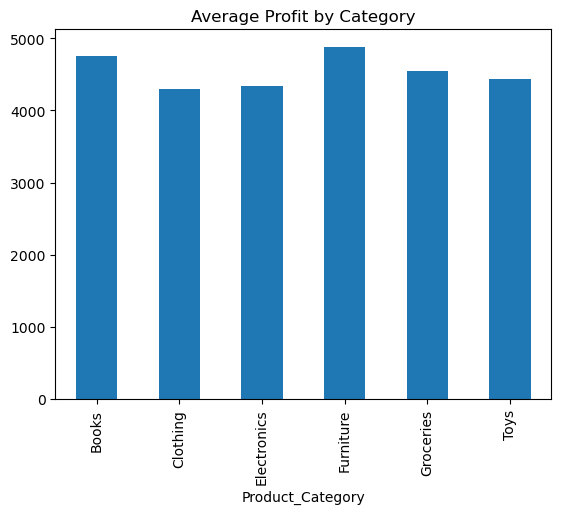

In [75]:

sales_data.groupby('Product_Category')['Profit_Estimate'].mean().plot(kind='bar',title='Average Profit by Category')



In [77]:
sales_data.to_csv(r"C:\Users\Lenovo\Downloads\cleaned_sales_data.csv")